In [1]:
import os
import json
from tqdm import tqdm

def convert_imcoords_to_bbox(imcoords):
    # imcoords는 문자열 형태의 좌표를 파싱하여 리스트로 변환
    coords = list(map(float, imcoords.split(',')))
    x_values = coords[0::2]  # 짝수 인덱스는 x 좌표
    y_values = coords[1::2]  # 홀수 인덱스는 y 좌표
    
    # 좌표로부터 bbox의 중심 좌표(cx, cy), 너비(width), 높이(height) 계산
    x_min = min(x_values)
    x_max = max(x_values)
    y_min = min(y_values)
    y_max = max(y_values)
    
    cx = (x_min + x_max) / 2
    cy = (y_min + y_max) / 2
    width = x_max - x_min
    height = y_max - y_min
    
    return cx, cy, width, height

def filter_and_modify_json(directory, output_directory):
    # 지정된 디렉토리 내 모든 JSON 파일 확인
    for filename in tqdm(os.listdir(directory), desc="Processing files", unit="file"):
        if filename.endswith(".json"):
            input_file_path = os.path.join(directory, filename).replace('\\', '/')
            
            with open(input_file_path, 'r', encoding='utf-8') as file:
                data = json.load(file)
            
            # 새로운 피처 저장 리스트
            filtered_features = []

            # 'features' 필드가 있는지 확인하고 반복
            if 'features' in data:
                for feature in data['features']:
                    if 'properties' in feature:
                        type_name = feature['properties'].get('type_name')
                        
                        # 'type_name'이 'ship(S)' 또는 'ship(L)'인 경우만 처리
                        if type_name in ['ship(S)', 'ship(L)']:
                            imcoords = feature['properties'].get('object_imcoords')
                            if imcoords:
                                # 좌표 변환 후 새로운 값 추가
                                cx, cy, width, height = convert_imcoords_to_bbox(imcoords)
                                feature['properties']['cx'] = cx
                                feature['properties']['cy'] = cy
                                feature['properties']['width'] = width
                                feature['properties']['height'] = height
                                
                                # 기존 데이터와 함께 새로운 properties로 업데이트
                                filtered_features.append(feature)

            # 새로운 JSON 구조 생성
            if filtered_features:
                new_data = {
                    "type": "FeatureCollection",
                    "features": filtered_features
                }

                # 출력 경로 설정 (출력 폴더에 저장)
                output_file_path = os.path.join(output_directory, filename).replace('\\', '/')
                with open(output_file_path, 'w', encoding='utf-8') as outfile:
                    json.dump(new_data, outfile, ensure_ascii=False, indent=4)
import os
import json

def check_for_other_classes(directory):
    other_classes_found = False
    other_classes = set()

    # 지정된 디렉토리 내 모든 JSON 파일 확인
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            file_path = os.path.join(directory, filename).replace('\\', '/')
            
            with open(file_path, 'r', encoding='utf-8') as file:
                data = json.load(file)
            
            # 'features' 필드가 있는지 확인하고 반복
            if 'features' in data:
                for feature in data['features']:
                    if 'properties' in feature:
                        type_name = feature['properties'].get('type_name')
                        
                        # 'ship(S)' 또는 'ship(L)' 외의 다른 클래스가 있는지 확인
                        if type_name not in ['ship(S)', 'ship(L)']:
                            other_classes_found = True
                            other_classes.add(type_name)

    # 결과 출력
    if other_classes_found:
        print("다른 클래스가 발견되었습니다:", other_classes)
    else:
        print("모든 JSON 파일이 'ship(S)' 또는 'ship(L)'만 포함하고 있습니다.")

In [3]:
# 사용 예시
input_directory = '../aihubdata/train/train_objects_labels'  # 입력 JSON 파일들이 있는 폴더
output_directory = './datasets/labels/train'  # 필터링 후 JSON 파일을 저장할 폴더

# 출력 폴더가 없으면 생성
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# 필터링 및 변환 실행
filter_and_modify_json(input_directory, output_directory)
check_for_other_classes(output_directory)

Processing files:   0%|          | 0/1747 [00:00<?, ?file/s]

Processing files: 100%|██████████| 1747/1747 [00:20<00:00, 85.82file/s] 


모든 JSON 파일이 'ship(S)' 또는 'ship(L)'만 포함하고 있습니다.


In [4]:

# 사용 예시
input_directory = '../aihubdata/valid//vaildate_objects_labels'  # 입력 JSON 파일들이 있는 폴더
output_directory = './datasets/labels/val'  # 필터링 후 JSON 파일을 저장할 폴더

# 출력 폴더가 없으면 생성
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# 필터링 및 변환 실행
filter_and_modify_json(input_directory, output_directory)
check_for_other_classes(output_directory)

Processing files: 100%|██████████| 219/219 [00:02<00:00, 90.83file/s]

모든 JSON 파일이 'ship(S)' 또는 'ship(L)'만 포함하고 있습니다.


In [5]:
train_list = os.listdir('./datasets/labels/train')
train_list.sort()
train_list

['OBJ00022_PS3_K3_NIA0078.json',
 'OBJ00022_PS3_K3_NIA0078.txt',
 'OBJ00028_PS3_K3_NIA0078.json',
 'OBJ00028_PS3_K3_NIA0078.txt',
 'OBJ00258_PS3_K3_NIA0081.json',
 'OBJ00258_PS3_K3_NIA0081.txt',
 'OBJ00261_PS3_K3_NIA0081.json',
 'OBJ00261_PS3_K3_NIA0081.txt',
 'OBJ00607_PS3_K3_NIA0086.json',
 'OBJ00607_PS3_K3_NIA0086.txt',
 'OBJ01399_PS3_K3_NIA0093.json',
 'OBJ01399_PS3_K3_NIA0093.txt',
 'OBJ01400_PS3_K3_NIA0093.json',
 'OBJ01400_PS3_K3_NIA0093.txt',
 'OBJ01505_PS3_K3_NIA0095.json',
 'OBJ01505_PS3_K3_NIA0095.txt',
 'OBJ01589_PS3_K3_NIA0097.json',
 'OBJ01589_PS3_K3_NIA0097.txt',
 'OBJ01654_PS3_K3_NIA0101.json',
 'OBJ01654_PS3_K3_NIA0101.txt',
 'OBJ01675_PS3_K3_NIA0102.json',
 'OBJ01675_PS3_K3_NIA0102.txt',
 'OBJ01691_PS3_K3_NIA0102.json',
 'OBJ01691_PS3_K3_NIA0102.txt',
 'OBJ01696_PS3_K3_NIA0102.json',
 'OBJ01696_PS3_K3_NIA0102.txt',
 'OBJ01701_PS3_K3_NIA0102.json',
 'OBJ01701_PS3_K3_NIA0102.txt',
 'OBJ01735_PS3_K3_NIA0104.json',
 'OBJ01735_PS3_K3_NIA0104.txt',
 'OBJ01937_PS3_K3_NIA0110

In [7]:
import os
import shutil
from tqdm import tqdm
import csv
import cv2

# .json 파일을 기반으로 .png 파일을 찾고, 해당 파일을 바로 복사하는 함수
def get_and_copy_img(json_path, img_path, save_dir):
    # save_dir이 없으면 디렉토리 생성
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # .json 파일을 기반으로 .png 파일을 찾아서 복사
    for filename in tqdm(os.listdir(json_path), desc="Processing files", unit="file"):
        # .json 파일명을 .png 파일명으로 변환
        png_file = filename.replace('.json', '.png')
        png_file = os.path.join(img_path, png_file).replace('\\', '/')
        
        # .png 파일이 존재하는지 확인하고, 존재하면 복사
        if os.path.exists(png_file):
            img = cv2.imread(png_file)
            
            cv2.imwrite(os.path.join(save_dir, png_file.split('/')[-1]), img)
            # shutil.copy(png_file, save_dir)
        else:
            print(f"Warning: {png_file} not found!")

In [8]:
# 사용 예시
json_train_dir = './datasets/labels/train'  # .json 파일들이 있는 디렉토리
img_train_dir = '../aihubdata/train/train_objects_images'  # .png 파일들이 있는 디렉토리
save_dir = './datasets/images/train'  # .png 파일을 복사할 디렉토리

# .json 파일을 기반으로 .png 파일을 찾고 바로 복사
get_and_copy_img(json_train_dir, img_train_dir, save_dir)

Processing files:   0%|          | 3/714 [00:00<00:50, 14.15file/s]

Processing files:   1%|          | 7/714 [00:00<00:37, 18.92file/s]

Processing files:   2%|▏         | 14/714 [00:00<00:33, 20.63file/s]

Processing files:   2%|▏         | 17/714 [00:00<00:34, 20.06file/s]

Processing files:   3%|▎         | 24/714 [00:01<00:29, 23.06file/s]

Processing files:   4%|▍         | 27/714 [00:01<00:34, 19.99file/s]

Processing files:   5%|▍         | 34/714 [00:01<00:32, 20.93file/s]

Processing files:   5%|▌         | 37/714 [00:01<00:33, 20.15file/s]

Processing files:   6%|▌         | 44/714 [00:02<00:34, 19.44file/s]

Processing files:   7%|▋         | 47/714 [00:02<00:35, 18.80file/s]

Processing files:   8%|▊         | 55/714 [00:02<00:32, 20.22file/s]

Processing files:   8%|▊         | 58/714 [00:02<00:30, 21.41file/s]

Processing files:   9%|▉         | 65/714 [00:03<00:31, 20.61file/s]

Processing files:  10%|█         | 72/714 [00:03<00:28, 22.38file/s]

Processing files:  11%|█         | 75/714 [00:03<00:29, 21.31file/s]

Processing files:  11%|█▏        | 82/714 [00:03<00:29, 21.79file/s]

Processing files:  12%|█▏        | 85/714 [00:04<00:30, 20.66file/s]

Processing files:  12%|█▏        | 88/714 [00:04<00:29, 21.29file/s]

Processing files:  13%|█▎        | 95/714 [00:04<00:33, 18.41file/s]

Processing files:  14%|█▍        | 99/714 [00:04<00:35, 17.54file/s]

Processing files:  14%|█▍        | 103/714 [00:05<00:29, 20.53file/s]

Processing files:  16%|█▌        | 111/714 [00:05<00:28, 21.40file/s]

Processing files:  16%|█▌        | 115/714 [00:05<00:27, 21.97file/s]

Processing files:  17%|█▋        | 123/714 [00:05<00:25, 22.87file/s]

Processing files:  18%|█▊        | 130/714 [00:06<00:24, 23.69file/s]

Processing files:  19%|█▊        | 133/714 [00:06<00:27, 21.30file/s]

Processing files:  20%|█▉        | 141/714 [00:06<00:25, 22.69file/s]

Processing files:  20%|██        | 145/714 [00:06<00:24, 23.16file/s]

Processing files:  21%|██        | 149/714 [00:07<00:24, 23.44file/s]

Processing files:  22%|██▏       | 155/714 [00:07<00:30, 18.56file/s]

Processing files:  23%|██▎       | 161/714 [00:07<00:28, 19.19file/s]

Processing files:  23%|██▎       | 165/714 [00:07<00:26, 20.70file/s]

Processing files:  24%|██▍       | 171/714 [00:08<00:32, 16.84file/s]

Processing files:  25%|██▍       | 177/714 [00:08<00:27, 19.18file/s]

Processing files:  26%|██▌       | 183/714 [00:09<00:27, 19.10file/s]

Processing files:  26%|██▌       | 187/714 [00:09<00:25, 20.56file/s]

Processing files:  27%|██▋       | 192/714 [00:09<00:29, 17.84file/s]

Processing files:  27%|██▋       | 195/714 [00:09<00:29, 17.56file/s]

Processing files:  28%|██▊       | 201/714 [00:10<00:30, 17.00file/s]

Processing files:  29%|██▊       | 205/714 [00:10<00:27, 18.50file/s]

Processing files:  29%|██▉       | 209/714 [00:10<00:31, 15.82file/s]

Processing files:  30%|███       | 215/714 [00:10<00:28, 17.58file/s]

Processing files:  31%|███       | 221/714 [00:11<00:25, 19.19file/s]

Processing files:  32%|███▏      | 225/714 [00:11<00:26, 18.33file/s]

Processing files:  32%|███▏      | 230/714 [00:11<00:23, 20.88file/s]

Processing files:  33%|███▎      | 233/714 [00:11<00:29, 16.40file/s]

Processing files:  33%|███▎      | 237/714 [00:12<00:35, 13.48file/s]

Processing files:  34%|███▍      | 243/714 [00:12<00:29, 15.78file/s]

Processing files:  35%|███▍      | 247/714 [00:12<00:26, 17.65file/s]

Processing files:  35%|███▌      | 251/714 [00:13<00:30, 15.11file/s]

Processing files:  36%|███▌      | 257/714 [00:13<00:26, 17.03file/s]

Processing files:  37%|███▋      | 261/714 [00:13<00:24, 18.57file/s]

Processing files:  37%|███▋      | 265/714 [00:13<00:24, 18.11file/s]

Processing files:  38%|███▊      | 271/714 [00:14<00:22, 19.60file/s]

Processing files:  39%|███▉      | 277/714 [00:14<00:22, 19.38file/s]

Processing files:  39%|███▉      | 281/714 [00:14<00:22, 19.06file/s]

Processing files:  40%|███▉      | 285/714 [00:14<00:21, 20.23file/s]

Processing files:  40%|████      | 289/714 [00:15<00:26, 16.03file/s]

Processing files:  41%|████▏     | 295/714 [00:15<00:22, 18.27file/s]

Processing files:  42%|████▏     | 297/714 [00:15<00:26, 16.01file/s]

Processing files:  42%|████▏     | 301/714 [00:15<00:24, 16.63file/s]

Processing files:  43%|████▎     | 305/714 [00:16<00:22, 18.27file/s]

Processing files:  44%|████▍     | 313/714 [00:16<00:19, 20.41file/s]

Processing files:  44%|████▍     | 316/714 [00:16<00:18, 21.41file/s]

Processing files:  45%|████▌     | 323/714 [00:16<00:20, 19.18file/s]

Processing files:  46%|████▌     | 327/714 [00:17<00:20, 18.72file/s]

Processing files:  46%|████▋     | 331/714 [00:17<00:19, 19.57file/s]

Processing files:  47%|████▋     | 336/714 [00:17<00:22, 17.05file/s]

Processing files:  48%|████▊     | 343/714 [00:18<00:21, 16.89file/s]

Processing files:  49%|████▊     | 347/714 [00:18<00:22, 16.43file/s]

Processing files:  49%|████▉     | 351/714 [00:18<00:23, 15.60file/s]

Processing files:  50%|████▉     | 355/714 [00:18<00:22, 15.95file/s]

Processing files:  50%|█████     | 359/714 [00:19<00:19, 17.92file/s]

Processing files:  51%|█████▏    | 367/714 [00:19<00:18, 18.82file/s]

Processing files:  52%|█████▏    | 371/714 [00:19<00:19, 17.87file/s]

Processing files:  53%|█████▎    | 375/714 [00:19<00:17, 19.56file/s]

Processing files:  54%|█████▎    | 383/714 [00:20<00:17, 19.16file/s]

Processing files:  54%|█████▍    | 387/714 [00:20<00:16, 19.76file/s]

Processing files:  54%|█████▍    | 389/714 [00:20<00:18, 17.67file/s]

Processing files:  55%|█████▌    | 393/714 [00:20<00:17, 18.81file/s]

Processing files:  56%|█████▌    | 399/714 [00:21<00:17, 18.34file/s]

Processing files:  57%|█████▋    | 405/714 [00:21<00:19, 16.02file/s]

Processing files:  57%|█████▋    | 407/714 [00:21<00:20, 14.65file/s]

Processing files:  57%|█████▋    | 409/714 [00:21<00:20, 15.09file/s]

Processing files:  58%|█████▊    | 413/714 [00:22<00:20, 14.36file/s]

Processing files:  59%|█████▊    | 419/714 [00:22<00:16, 17.51file/s]

Processing files:  60%|█████▉    | 427/714 [00:22<00:14, 20.43file/s]

Processing files:  60%|██████    | 431/714 [00:23<00:13, 21.05file/s]

Processing files:  61%|██████▏   | 438/714 [00:23<00:13, 20.65file/s]

Processing files:  62%|██████▏   | 441/714 [00:23<00:14, 19.42file/s]

Processing files:  63%|██████▎   | 449/714 [00:23<00:12, 21.09file/s]

Processing files:  63%|██████▎   | 453/714 [00:24<00:12, 21.55file/s]

Processing files:  65%|██████▍   | 461/714 [00:24<00:11, 22.23file/s]

Processing files:  65%|██████▌   | 465/714 [00:24<00:11, 22.53file/s]

Processing files:  66%|██████▌   | 473/714 [00:25<00:10, 22.64file/s]

Processing files:  67%|██████▋   | 477/714 [00:25<00:10, 22.66file/s]

Processing files:  68%|██████▊   | 485/714 [00:25<00:10, 22.27file/s]

Processing files:  68%|██████▊   | 489/714 [00:25<00:10, 21.96file/s]

Processing files:  69%|██████▉   | 493/714 [00:25<00:10, 22.07file/s]

Processing files:  70%|██████▉   | 497/714 [00:26<00:09, 22.27file/s]

Processing files:  71%|███████   | 505/714 [00:26<00:09, 22.81file/s]

Processing files:  71%|███████▏  | 509/714 [00:26<00:08, 22.90file/s]

Processing files:  72%|███████▏  | 517/714 [00:26<00:08, 22.90file/s]

Processing files:  73%|███████▎  | 521/714 [00:27<00:08, 22.92file/s]

Processing files:  74%|███████▍  | 529/714 [00:27<00:08, 23.05file/s]

Processing files:  75%|███████▍  | 535/714 [00:27<00:08, 20.72file/s]

Processing files:  75%|███████▌  | 539/714 [00:28<00:08, 20.97file/s]

Processing files:  76%|███████▌  | 543/714 [00:28<00:07, 22.47file/s]

Processing files:  77%|███████▋  | 547/714 [00:28<00:07, 22.79file/s]

Processing files:  78%|███████▊  | 555/714 [00:28<00:07, 22.36file/s]

Processing files:  78%|███████▊  | 559/714 [00:28<00:07, 22.06file/s]

Processing files:  79%|███████▉  | 563/714 [00:29<00:06, 22.22file/s]

Processing files:  79%|███████▉  | 567/714 [00:29<00:06, 22.29file/s]

Processing files:  81%|████████  | 575/714 [00:29<00:06, 22.79file/s]

Processing files:  82%|████████▏ | 582/714 [00:29<00:05, 22.84file/s]

Processing files:  82%|████████▏ | 585/714 [00:30<00:06, 20.48file/s]

Processing files:  83%|████████▎ | 593/714 [00:30<00:05, 21.34file/s]

Processing files:  84%|████████▎ | 597/714 [00:30<00:05, 22.09file/s]

Processing files:  85%|████████▍ | 605/714 [00:30<00:05, 21.21file/s]

Processing files:  85%|████████▌ | 609/714 [00:31<00:04, 21.72file/s]

Processing files:  86%|████████▌ | 613/714 [00:31<00:04, 21.51file/s]

Processing files:  87%|████████▋ | 619/714 [00:31<00:04, 19.37file/s]

Processing files:  87%|████████▋ | 623/714 [00:31<00:04, 20.57file/s]

Processing files:  88%|████████▊ | 629/714 [00:32<00:04, 19.58file/s]

Processing files:  89%|████████▊ | 633/714 [00:32<00:03, 20.74file/s]

Processing files:  89%|████████▉ | 637/714 [00:32<00:03, 21.28file/s]

Processing files:  90%|█████████ | 645/714 [00:32<00:03, 21.54file/s]

Processing files:  91%|█████████ | 649/714 [00:33<00:03, 21.56file/s]

Processing files:  92%|█████████▏| 657/714 [00:33<00:02, 21.27file/s]

Processing files:  93%|█████████▎| 661/714 [00:33<00:02, 21.24file/s]

Processing files:  93%|█████████▎| 665/714 [00:33<00:02, 21.32file/s]

Processing files:  94%|█████████▎| 668/714 [00:33<00:02, 20.91file/s]

Processing files:  94%|█████████▍| 671/714 [00:34<00:02, 18.67file/s]

Processing files:  95%|█████████▍| 677/714 [00:34<00:01, 18.83file/s]

Processing files:  95%|█████████▌| 681/714 [00:34<00:01, 19.86file/s]

Processing files:  96%|█████████▋| 689/714 [00:35<00:01, 21.04file/s]

Processing files:  97%|█████████▋| 693/714 [00:35<00:00, 21.50file/s]

Processing files:  98%|█████████▊| 697/714 [00:35<00:00, 22.05file/s]

Processing files:  99%|█████████▊| 705/714 [00:35<00:00, 22.37file/s]

Processing files: 100%|█████████▉| 712/714 [00:36<00:00, 23.82file/s]

Processing files: 100%|██████████| 714/714 [00:36<00:00, 19.76file/s]

In [9]:
# 사용 예시
json_train_dir = './datasets/labels/val'  # .json 파일들이 있는 디렉토리
img_train_dir = '../aihubdata/valid/vaildate_objects_images'  # .png 파일들이 있는 디렉토리
save_dir = './datasets/images/val'  # .png 파일을 복사할 디렉토리

# .json 파일을 기반으로 .png 파일을 찾고 바로 복사
get_and_copy_img(json_train_dir, img_train_dir, save_dir)

Processing files: 100%|██████████| 37/37 [00:03<00:00, 11.01file/s]


In [10]:
# .json 파일과 .png 파일 경로를 리스트로 반환하는 함수
def get_img_json_list(json_path, img_path):
    img_json_list = []
    for filename in tqdm(os.listdir(json_path), desc="Processing files", unit="file"):
        # .json 파일명을 .png 파일명으로 변환
        json_file = os.path.join(json_path, filename).replace('\\', '/')
        png_file = filename.replace('.json', '.png')
        png_file = os.path.join(img_path, png_file).replace('\\', '/')

        # .png 파일이 실제로 존재하는지 확인 후 리스트에 추가
        if os.path.exists(png_file):
            img_json_list.append([png_file, json_file])
        else:
            print(f"Warning: {png_file} not found!")

    return img_json_list

# 추출된 경로 리스트를 CSV 파일로 저장하는 함수
def save_to_csv(data, output_csv):
    # CSV 파일로 저장
    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        # 헤더 작성
        writer.writerow(["Image", "JSON"])
        # 데이터 작성
        writer.writerows(data)

In [11]:
# 사용 예시
label_dir = './datasets/labels/train'  # .json 파일들이 있는 디렉토리
img_dir = './datasets/images/train'  # .png 파일들이 있는 디렉토리
output_csv = 'train.csv'  # 경로 정보를 저장할 CSV 파일명

# .json과 .png 경로 추출
img_json_list = get_img_json_list(label_dir, img_dir)

# 경로 정보를 CSV 파일로 저장
save_to_csv(img_json_list, output_csv)

Processing files: 100%|██████████| 714/714 [00:00<00:00, 18788.60file/s]

In [12]:
# 사용 예시
label_dir = './datasets/labels/val'  # .json 파일들이 있는 디렉토리
img_dir = './datasets/images/val'  # .png 파일들이 있는 디렉토리
output_csv = 'valid.csv'  # 경로 정보를 저장할 CSV 파일명

# .json과 .png 경로 추출
img_json_list = get_img_json_list(label_dir, img_dir)

# 경로 정보를 CSV 파일로 저장
save_to_csv(img_json_list, output_csv)

Processing files: 100%|██████████| 37/37 [00:00<00:00, 12335.21file/s]


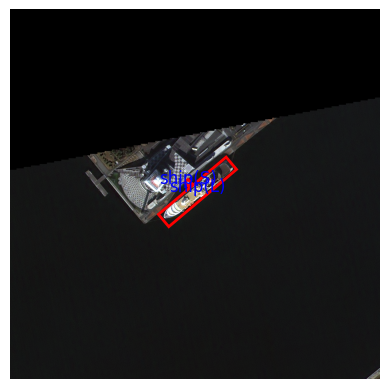

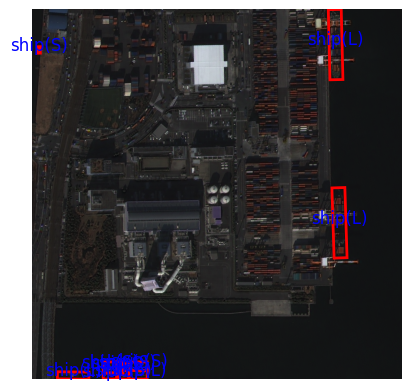

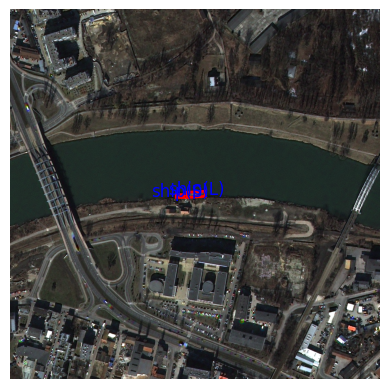

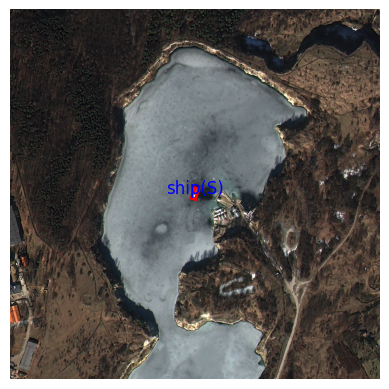

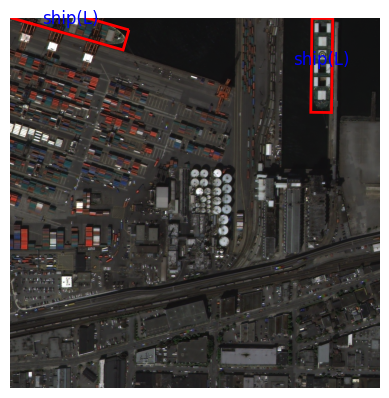

In [15]:
import os
import csv
import json
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches
import numpy as np

# 유클리드 거리 계산 함수
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def manhattan_distance(coords):
    x_values = coords[0::2]  # 짝수 인덱스는 x 좌표
    y_values = coords[1::2]  # 홀수 인덱스는 y 좌표
    
    # 좌표로부터 bbox의 중심 좌표(cx, cy), 너비(width), 높이(height) 계산
    x_min = min(x_values)
    x_max = max(x_values)
    y_min = min(y_values)
    y_max = max(y_values)

    width = x_max - x_min
    height = y_max - y_min
    
    return width, height


# JSON 파일을 읽어들이는 함수 (BBox 좌표와 angle 포함)
def get_bbox_from_json(json_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    results = []
    
    if 'features' in data:
        for feature in data['features']:
            if 'properties' in feature:
                # object_imcoords를 파싱하여 좌표 추출
                imcoords = feature['properties'].get('object_imcoords', '')
                if imcoords:
                    coords = list(map(float, imcoords.split(',')))

                    # 맨해튼 거리 계산
                    # width, height = manhattan_distance(coords)

                    coords = np.array(coords).reshape(-1, 2)  # 2D 좌표로 변환

                    # 중심 좌표 계산
                    cx = np.mean(coords[:, 0])
                    cy = np.mean(coords[:, 1])

                    # 인접한 두 점으로부터 너비와 높이 계산
                    width = euclidean_distance(coords[0], coords[1])
                    height = euclidean_distance(coords[1], coords[2])

                    # 각도 추출
                    angle = feature['properties'].get('object_angle', 0.0)

                    # 회전된 바운딩 박스 좌표 저장 (cx, cy, width, height, angle)
                    results.append((cx, cy, width, height, angle))
    
    return results

def get_coords_from_json(json_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    results = []
    
    if 'features' in data:
        for feature in data['features']:
            if 'properties' in feature:
                # object_imcoords를 파싱하여 좌표 추출
                imcoords = feature['properties'].get('object_imcoords', '')
                class_name = feature['properties'].get('type_name', '')
                
                if imcoords:
                    coords = list(map(float, imcoords.split(',')))

                    results.append((class_name,coords))
    return results

def save_coords_to_txt(coords_list, output_file, img_path):
    with open(output_file, 'w') as f:
        for coords in coords_list:
            class_name, coords = coords
            coords = np.array(coords) / 1024.0
    
             # 각 좌표값이 0 미만이면 0, 1 이상이면 1로 클리핑
            coords = np.clip(coords, 0, 1)

            x1, y1, x2, y2, x3, y3, x4, y4 = coords
            
            if class_name == 'ship(S)':
                f.write(f"0 {x1:.6f} {y1:.6f} {x2:.6f} {y2:.6f} {x3:.6f} {y3:.6f} {x4:.6f} {y4:.6f}\n")
            else: 
                f.write(f"1 {x1:.6f} {y1:.6f} {x2:.6f} {y2:.6f} {x3:.6f} {y3:.6f} {x4:.6f} {y4:.6f}\n")

# 바운딩 박스 정보를 txt 파일로 저장하는 함수
def save_bbox_to_txt(bbox_list, output_file, img_path):
    with open(output_file, 'w') as f:
        for bbox in bbox_list:
            cx, cy, width, height, angle = bbox
            cx, cy, width, height, angle = cx/1024, cy/1024, width/1024, height/1024, angle

            # if cx < 0 or cy < 0 or width < 0 or height < 0 or cx > 1 or cy > 1 or width > 1 or height > 1:
                # print(f"Warning: {img_path} - bbox가 이미지 밖으로 벗어납니다.")
                # visualize_image_with_bbox(img_path, bbox_list)
            if cx < 0 or cx > 1:
                cx = max(0, min(cx, 1))
            if cy < 0 or cy > 1:
                cy = max(0, min(cy, 1))
            if width < 0 or width > 1:
                width = max(0, min(width, 1))
            if height < 0 or height > 1:
                height = max(0, min(height, 1))

            f.write(f"0 {cx:.6f} {cy:.6f} {height:.6f} {width:.6f} {angle:.6f}\n")
            # f.write(f"0 {cx:.6f} {cy:.6f} {height:.6f} {width:.6f}\n")


def visualize_image_with_coords(image_path, coords_list):
    img = Image.open(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    for class_name, coords in coords_list:
        # coords: [x1, y1, x2, y2, x3, y3, x4, y4]
        coords = np.array(coords)
        coords = coords.reshape(4, 2)  # 4개의 좌표쌍 (x, y)으로 변환
        
        # 다각형 그리기 (4개의 좌표를 사용한 회전된 바운딩 박스)
        polygon = patches.Polygon(coords, closed=True, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(polygon)
        
        # 클래스 이름 표시 (옵션)
        cx, cy = np.mean(coords[:, 0]), np.mean(coords[:, 1])  # 중심 좌표
        ax.text(cx, cy, class_name, color='blue', fontsize=12, ha='center')

    plt.axis('off')
    plt.show()


# CSV에서 이미지 경로와 JSON 경로를 불러오는 함수
def load_csv(csv_path):
    data = []
    with open(csv_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # 헤더 스킵
        for row in reader:
            img_path, json_path = row
            data.append((img_path, json_path))
    return data

# 사용 예시
csv_path = 'train.csv'  # CSV 파일 경로
data = load_csv(csv_path)  # 이미지와 JSON 경로 불러오기

# 5개의 이미지와 바운딩 박스를 시각화하고, BBox 정보를 txt로 저장
for i, (img_path, json_path) in enumerate(data):
    if os.path.exists(img_path) and os.path.exists(json_path):
        bbox_list = get_coords_from_json(json_path)  # JSON에서 BBox 추출
        
        # .txt 파일로 저장할 파일명 정의
        output_file = json_path.replace('.json', '.txt')  # .json 파일명을 .txt로 변경
        save_coords_to_txt(bbox_list, output_file, img_path)  # bbox 정보를 txt로 저장
        
        if i < 5:
            # 이미지와 BBox 시각화
            visualize_image_with_coords(img_path, bbox_list)


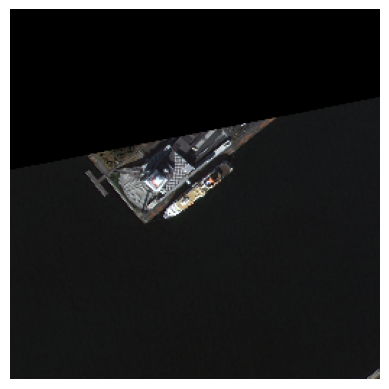

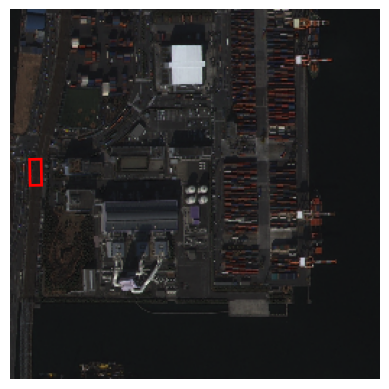

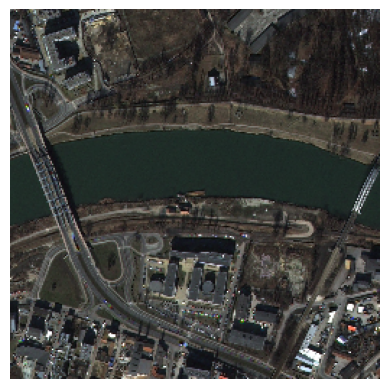

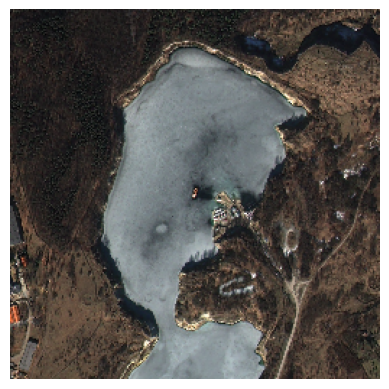

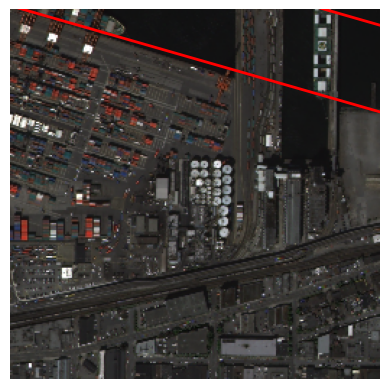

In [14]:
import os
import csv
import json
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches
import numpy as np

# 유클리드 거리 계산 함수
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# JSON 파일을 읽어들이는 함수 (BBox 좌표와 angle 포함)
def get_bbox_from_json(json_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    results = []
    
    if 'features' in data:
        for feature in data['features']:
            if 'properties' in feature:
                # object_imcoords를 파싱하여 좌표 추출
                imcoords = feature['properties'].get('object_imcoords', '')
                if imcoords:
                    coords = list(map(float, imcoords.split(',')))
                    coords = np.array(coords).reshape(-1, 2)  # 2D 좌표로 변환

                    # 중심 좌표 계산
                    cx = np.mean(coords[:, 0])
                    cy = np.mean(coords[:, 1])

                    # 인접한 두 점으로부터 너비와 높이 계산
                    width = euclidean_distance(coords[0], coords[1])
                    height = euclidean_distance(coords[1], coords[2])

                    # 각도 추출
                    angle = feature['properties'].get('object_angle', 0.0)

                    # 회전된 바운딩 박스 좌표 저장 (cx, cy, width, height, angle)
                    results.append((cx, cy, width, height, angle))

    return results

# 이미지와 바운딩 박스를 시각화하는 함수
def visualize_image_with_bbox(image_path, bbox_list):
    # 이미지를 불러오기
    img = Image.open(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # 바운딩 박스 그리기
    for bbox in bbox_list:
        cx, cy, width, height, angle = bbox

        # 바운딩 박스 좌표 계산 (중심 기준으로 회전)
        rect_coords = [
            [-width / 2, -height / 2],  # 좌상단
            [width / 2, -height / 2],   # 우상단
            [width / 2, height / 2],    # 우하단
            [-width / 2, height / 2]    # 좌하단
        ]

        # 회전 각도를 라디안으로 변환하여 회전 행렬 적용
        theta = np.radians(angle)
        theta = -theta  # 이미지에서 반시계 방향으로 회전하기 때문에 부호 반전
        rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
        rotated_coords = np.dot(rect_coords, rotation_matrix)

        # 중심 좌표로 평행 이동
        rotated_coords[:, 0] += cx
        rotated_coords[:, 1] += cy

        # 회전된 좌표를 Polygon으로 시각화
        polygon = patches.Polygon(rotated_coords, closed=True, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(polygon)
    
    plt.axis('off')
    plt.show()

# CSV에서 이미지 경로와 JSON 경로를 불러오는 함수
def load_csv(csv_path):
    data = []
    with open(csv_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # 헤더 스킵
        for row in reader:
            img_path, json_path = row
            data.append((img_path, json_path))
    return data

# 사용 예시
csv_path = 'train.csv'  # CSV 파일 경로
data = load_csv(csv_path)  # 이미지와 JSON 경로 불러오기

# 5개의 이미지와 바운딩 박스를 시각화
for i, (img_path, json_path) in enumerate(data):
    if i >= 5:
        break
    if os.path.exists(img_path) and os.path.exists(json_path):
        bbox_list = get_bbox_from_json(json_path)  # JSON에서 BBox 추출
        visualize_image_with_bbox(img_path, bbox_list)  # 이미지와 BBox 시각화


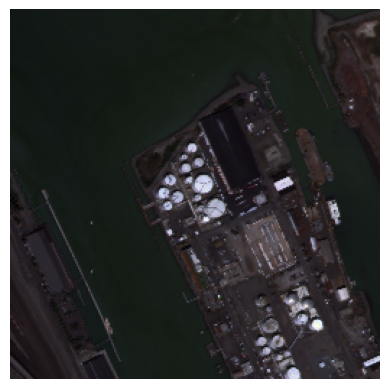

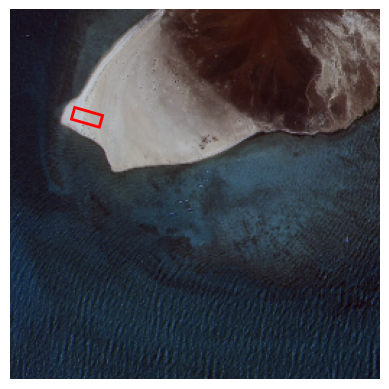

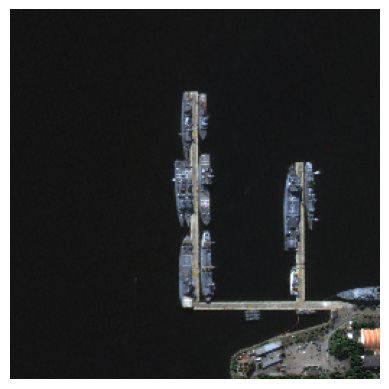

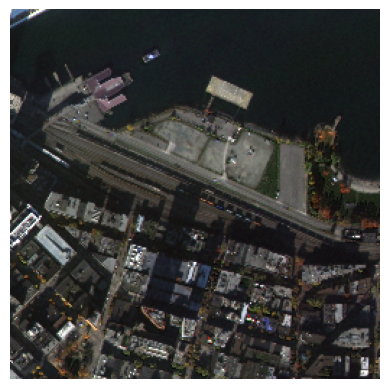

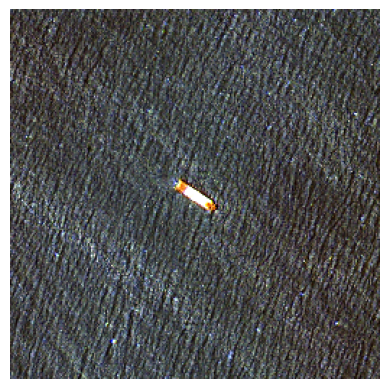

In [15]:
# 사용 예시
csv_path = 'valid.csv'  # CSV 파일 경로
data = load_csv(csv_path)  # 이미지와 JSON 경로 불러오기

# 5개의 이미지와 바운딩 박스를 시각화
for i, (img_path, json_path) in enumerate(data):
    if i >= 5:
        break
    if os.path.exists(img_path) and os.path.exists(json_path):
        bbox_list = get_bbox_from_json(json_path)  # JSON에서 BBox 추출
        visualize_image_with_bbox(img_path, bbox_list)  # 이미지와 BBox 시각화